# 20200611 Lab06: SOFTMAX Classification

In [1]:
import tensorflow as tf
import numpy as np

## Create Dataset

In [12]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

### 문제 1: 'Softmax Classification' 단계별로 이해하기

- 각 단계별로 존재하는 '???'을 채워주세요!
- '???'의 개수에 상관없이, 분류 모델이 제대로 작동할 수 있도록 셀(cell)을 작성해도 좋습니다.
- 단계별로 존재하는 주석을 참조하시면 문제 풀이에 도움이 될 수 있습니다.
- 텐서플로우의 모든 메소드를 암기하는 것이 꼭 필요한지도 모르겠고, 아직 불가능하다고 생각합니다. 다만 식이 전개되는 과정과, 어떤 변수가 어떤 스텝에서 어디에 할당되는지에 초점을 맞추고 문제를 풀어주시면 좋을 것 같습니다.

In [13]:
# convert into numpy and float format
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

nb_classes = 3 # num classes

print(x_data.shape)
print(y_data.shape)

(8, 4)
(8, 3)


## Weight and Bias

In [14]:
W = tf.Variable(tf.random.normal((4, nb_classes)), name = 'weight')
b = tf.Variable(tf.random.normal((nb_classes, )), name = 'bias')
variables = [W, b]

print(W, b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.1685581 ,  1.1552725 , -0.01943078],
       [ 0.48602352, -2.2948468 , -0.5894232 ],
       [ 1.4911681 , -0.8932331 ,  0.21835703],
       [ 0.81618196,  0.9535582 ,  0.36904445]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([-0.6501424 , -1.7318914 , -0.01782191], dtype=float32)>


## Softmax Regression

In [15]:
# tf.nn.softmax computes softmax activations

def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W) + b) # 출제

print(hypothesis(x_data))

tf.Tensor(
[[9.6817654e-01 3.5758381e-04 3.1465892e-02]
 [9.9590236e-01 1.5505216e-04 3.9425828e-03]
 [9.9811256e-01 5.4864236e-04 1.3388224e-03]
 [9.9992990e-01 1.4361542e-05 5.5735421e-05]
 [9.9999988e-01 4.2204423e-14 1.5442789e-07]
 [9.9997866e-01 5.2916768e-08 2.1371246e-05]
 [9.9999988e-01 7.1978610e-14 8.1062844e-08]
 [1.0000000e+00 4.7164812e-16 4.9521898e-09]], shape=(8, 3), dtype=float32)


## Cost Function(Cross Entropy) & Gradient Descent

In [16]:
def cost_fn(X, Y):
    logits = hypothesis(X) # 예측값을 담은 행벡터 logits 반환, 예측값은 0~1 사이
    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(logits), axis=1)) #출제 
    # 두 줄에 걸쳐서 적어도 괜찮습니다 # 여기서 Y값 = grounded_value, logits = predicted_value
    return cost #출제

print(cost_fn(x_data, y_data))

tf.Tensor(9.289062, shape=(), dtype=float32)


In [17]:
def grad_fn(X,Y): # 비용함수를 최적화하기 위해 Gradient Descent 방식을 사용합니다
    with tf.GradientTape() as tape: #출제
        loss = cost_fn(X,Y)
        grads = tape.gradient(loss, variables) # 여기서 variables = [W, b]
        return grads
    
print(grad_fn(x_data, y_data))

[<tf.Tensor: id=7363, shape=(4, 3), dtype=float32, numpy=
array([[ 1.4942521 , -0.7497036 , -0.7445485 ],
       [ 1.7412816 , -1.2498208 , -0.49146083],
       [ 2.7437205 , -1.8746824 , -0.86903787],
       [ 2.8689938 , -1.9996332 , -0.8693606 ]], dtype=float32)>, <tf.Tensor: id=7362, shape=(3,), dtype=float32, numpy=array([ 0.7452625 , -0.37486553, -0.37039688], dtype=float32)>]


## Train

In [18]:
def fit(X, Y, epochs=2000, verbose=100):
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
    
    for i in range(epochs): #출제
        grads = grad_fn(X, Y) #출제
        optimizer.apply_gradients(zip(grads, variables)) #출제
        
        if (i==0) | ((i+1)%verbose == 0): # 손실이 줄어드는 과정을 출력
            print('Loss at epoch %d: %f' %(i+1, cost_fn(X,Y).numpy()))
            
fit(x_data, y_data)

Loss at epoch 1: 5.933627
Loss at epoch 100: 0.643614
Loss at epoch 200: 0.568983
Loss at epoch 300: 0.513505
Loss at epoch 400: 0.463772
Loss at epoch 500: 0.416375
Loss at epoch 600: 0.369937
Loss at epoch 700: 0.323933
Loss at epoch 800: 0.279038
Loss at epoch 900: 0.242869
Loss at epoch 1000: 0.228195
Loss at epoch 1100: 0.217116
Loss at epoch 1200: 0.207044
Loss at epoch 1300: 0.197845
Loss at epoch 1400: 0.189407
Loss at epoch 1500: 0.181640
Loss at epoch 1600: 0.174467
Loss at epoch 1700: 0.167823
Loss at epoch 1800: 0.161651
Loss at epoch 1900: 0.155904
Loss at epoch 2000: 0.150541


## Prediction Check

In [20]:
# Prediction

sample_data = [[2,1,3,2]]
sample_data = np.array(sample_data, dtype=np.float32)

a = hypothesis(sample_data)

print(a)
print(tf.argmax(a, 1))

tf.Tensor([[0.00196636 0.07695978 0.9210738 ]], shape=(1, 3), dtype=float32)
tf.Tensor([2], shape=(1,), dtype=int64)


In [21]:
b = hypothesis(x_data)

print(b)
print(tf.argmax(b,1)) # 예측값을 보여주세요
print(tf.argmax(y_data, 1)) # 실제 값과 비교해보기

tf.Tensor(
[[4.3319219e-06 1.3351535e-03 9.9866056e-01]
 [1.9663577e-03 7.6959759e-02 9.2107391e-01]
 [3.4999463e-08 1.5631154e-01 8.4368837e-01]
 [9.3102545e-07 8.5774279e-01 1.4225632e-01]
 [2.4870418e-01 7.3973882e-01 1.1557008e-02]
 [1.3076060e-01 8.6911672e-01 1.2264834e-04]
 [7.6162165e-01 2.3832038e-01 5.7982514e-05]
 [9.2007053e-01 7.9928361e-02 1.1167656e-06]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


## Convert as Class

In [43]:
class softmax_classifier(tf.keras.Model):
    def __init__(self, nb_classes):
#         super(softmax_classifier, self).__init__() # 이해 x
        self.W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
        self.b = tf.Variable(tf.random.normal((nb_classes, )), name='bias')
        self._variables = [self.W, self.b]
        
    def softmax_regression(self, X):
        return tf.nn.softmax(tf.matmul(X, self.W) + self.b)
    
    def cost_fn(self, X, Y):
        logits = self.softmax_regression(X)
        cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(logits), axis=1))
        return cost
    
    def grad_fn(self, X, Y):
        with tf.GradientTape() as tape:
            cost = self.cost_fn(X, Y)
            grads = tape.gradient(cost, self._variables)
            return grads
        
    def fit(self, X, Y, epochs=2000, verbose=500):
        optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1)
        
        for i in range(epochs):
            grads = self.grad_fn(X, Y)
            optimizer.apply_gradients(zip(grads, self._variables))
            
            if (i==0) | ((i+1)%verbose==0):
                print('Loss at epoch %d: %f' %(i+1, self.cost_fn(X, Y).numpy()))
    
    # 예측 함수를 클래스 내부에 정의하는 경우
    def prediction(self, X, Y):
        pred = tf.argmax(self.softmax_regression(X), 1)
        correct_pred = tf.equal(pred, tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        return accuracy

In [44]:
model = softmax_classifier(nb_classes=3)
model.fit(x_data, y_data)

Loss at epoch 1: 7.395423
Loss at epoch 500: 0.407603
Loss at epoch 1000: 0.231601
Loss at epoch 1500: 0.183409
Loss at epoch 2000: 0.151579


### 위에서 학습한 모델을 바탕으로, 주어진 sample data의 범주를 예측하세요

In [45]:
sample_data_2 = [[3,6,1,1]]
sample_data_2 = np.array(sample_data_2, dtype=np.float32)

answer = model.softmax_regression(sample_data_2)

print(answer)
print(tf.argmax(answer,1))

tf.Tensor([[4.2244087e-16 3.5772047e-08 1.0000000e+00]], shape=(1, 3), dtype=float32)
tf.Tensor([2], shape=(1,), dtype=int64)


In [47]:
# 예측 함수를 클래스 내부에 정의한 경우

print(model.prediction(x_data, y_data))

tf.Tensor(1.0, shape=(), dtype=float32)


## 문제3: 베르누이 분포에서의 Logistic Cost vs Cross Entropy

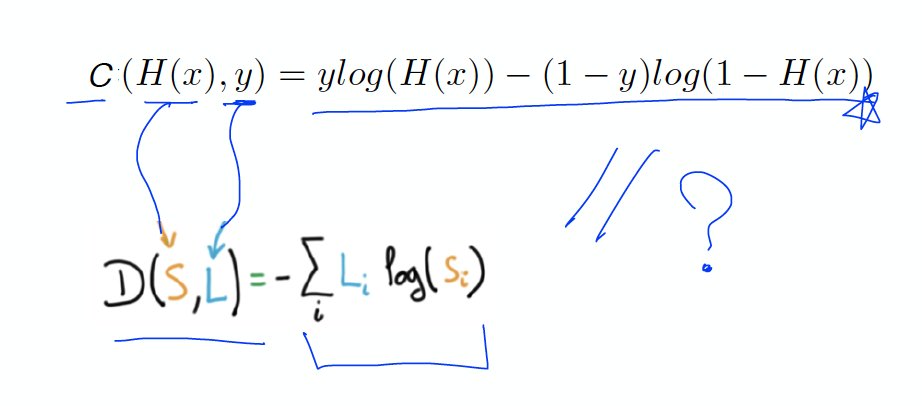

- 주어진 이미지에서 위의 식은 Logistic Cost, 아래의 식은 Cross Entropy를 정의하는 수식입니다.
- 이번 강의에서 주어진 두 식은 본질적으로 동일하고, 왜 그런지는 직접 생각해보라고 하셨습니다.
- 그래서 생각할 시간을 함께 갖고자 마지막 문제로 출제하였습니다.
- 기계학습 10주차 강의에서 배운 'log-likelihood'의 도출 과정을 참고하면, '이진 분류 체계'에서 두 식의 동일성을 유도하는데 도움이 될 수 있습니다.